In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

module_path = (Path().resolve().parent/ "Modules")
sys.path.append(str(module_path))

import my_modules, model_tuner # 自作モジュール

In [2]:
names = [
    "race_id",
    "year",
    "month",
    "day",
    "times",
    "place",
    "daily",
    "race_num",
    "horse",
    "jockey_id",
    "horse_N",
    "waku_num",
    "horse_num",
    "class_code",
    "track_code",
    "corner_num",
    "dist",
    "state",
    "weather",
    "age_code",
    "sex",
    "age",
    "basis_weight",
    "blinker",
    "weight",
    "inc_dec",
    "weight_code",
    "win_odds",
    "rank",
    "time_diff",
    "time",
    "corner1_rank",
    "corner2_rank",
    "corner3_rank",
    "corner4_rank",
    "last_3F_time",
    "last_3F_rank",
    "Ave_3F",
    "PCI",
    "last_3F_time_diff",
    "leg",
    "pop",
    "prize",
    "error_code",
    "father",
    "mother",
    "id"
]


In [3]:
df = pd.read_csv("../Data/record_data_2023.csv", encoding="shift-jis", header=None, names=names)
df.head()

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,Ave_3F,PCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,id
0,202307220101010101,23,7,22,1,札幌,1,1,ウィスピースノー,1095,...,35.8,53.8,0.8,後方,5.0,55,0,ワールドエース,ハイリマイリ,2021100648
1,202307220101010102,23,7,22,1,札幌,1,1,ロードスタウト,1157,...,35.6,51.4,0.6,中団,7.0,0,0,ロードカナロア,フィラデルフィア,2021100159
2,202307220101010103,23,7,22,1,札幌,1,1,コミックガール,1197,...,35.6,50.8,0.6,中団,4.0,0,0,シルバーステート,コイクレナイ,2021100265
3,202307220101010104,23,7,22,1,札幌,1,1,デビルシズカチャン,5339,...,35.3,51.1,0.3,先行,3.0,83,0,ベストウォーリア,シシリアンブリーズ,2021105553
4,202307220101010105,23,7,22,1,札幌,1,1,サトミノキラリ,1170,...,35.2,52.6,0.2,先行,1.0,550,0,ビッグアーサー,パレード,2021101429


#### 共通の前処理を実行

In [4]:
df2 = my_modules.common_process(df)

C:\Users\ken05\Documents\others\HORSE_RACING\Modules\my_modules.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["place_num"] = df_copy["place"].replace(place_dict).astype(int)


In [ ]:
feature_col = ["waku_num", "horse_num", "sex", "age", "basis_weight", "blinker", "weight", "inc_dec"]
models = model_tuner.simple_lightGBM(df2, feature_col=feature_col)
# 障害、ダート等でも分けてみる

[I 2025-05-28 23:36:57,847] A new study created in memory with name: no-name-cfcf3b9e-1914-401f-916d-017c1e86f465
[I 2025-05-28 23:36:57,962] Trial 0 finished with value: 0.3966636907599552 and parameters: {'max_bin': 53, 'num_leaves': 2, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 8.183461586687546, 'bagging_fraction': 0.47755805482427915, 'bagging_freq': 89, 'feature_fraction': 0.955959712013951, 'lambda_l1': 5.3657798181460326, 'lambda_l2': 3.0526015252923586, 'min_gain_to_split': 3.9738453816739074, 'max_depth': 100, 'learning_rate': 0.001460536087233766, 'path_smooth': 6.962394183619387}. Best is trial 0 with value: 0.3966636907599552.


Start tuning of horse_8


[I 2025-05-28 23:36:58,045] Trial 1 finished with value: 0.3945469099457069 and parameters: {'max_bin': 40, 'num_leaves': 13, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 2.103833622799769, 'bagging_fraction': 0.8545633011410754, 'bagging_freq': 59, 'feature_fraction': 0.9688380385111884, 'lambda_l1': 0.2600629308008215, 'lambda_l2': 0.0681202539815643, 'min_gain_to_split': 7.9206084454145085, 'max_depth': 24, 'learning_rate': 0.6651721916624639, 'path_smooth': 3.1989698215449036}. Best is trial 1 with value: 0.3945469099457069.
[I 2025-05-28 23:36:58,131] Trial 2 finished with value: 0.396401560876664 and parameters: {'max_bin': 177, 'num_leaves': 11, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 1.3686787467213544, 'bagging_fraction': 0.33310497442982234, 'bagging_freq': 40, 'feature_fraction': 0.7943209815875031, 'lambda_l1': 0.014051816748079251, 'lambda_l2': 2.3205877803596713, 'min_gain_to_split': 5.529880827568614, 'max_depth': 79, 'learning_rate': 0.00081024160846284

Best params :  {'max_bin': 20, 'num_leaves': 41, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 5.416219348691531, 'bagging_fraction': 0.6378238185952241, 'bagging_freq': 1, 'feature_fraction': 0.2564043437707456, 'lambda_l1': 0.0442680534427374, 'lambda_l2': 1.2059389389994704e-05, 'min_gain_to_split': 0.033283404453576255, 'max_depth': 31, 'learning_rate': 0.6913760130152616, 'path_smooth': 5.8015014597583665}


[I 2025-05-28 23:37:12,025] A new study created in memory with name: no-name-c2456303-924a-41f0-b4cb-2d85a2ff4154
[I 2025-05-28 23:37:12,141] Trial 0 finished with value: 0.3491090979482742 and parameters: {'max_bin': 21, 'num_leaves': 93, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 3.9512310362879037, 'bagging_fraction': 0.38887830340410146, 'bagging_freq': 26, 'feature_fraction': 0.7482997496573606, 'lambda_l1': 1.5704790778956788, 'lambda_l2': 0.0952572094778889, 'min_gain_to_split': 3.938407344376549, 'max_depth': 36, 'learning_rate': 0.00016540085338350913, 'path_smooth': 9.969730233645368}. Best is trial 0 with value: 0.3491090979482742.


End tuning of horse:8
Start tuning of horse_9


[I 2025-05-28 23:37:12,214] Trial 1 finished with value: 0.34912464103060686 and parameters: {'max_bin': 88, 'num_leaves': 63, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 7.4303945113483065, 'bagging_fraction': 0.34675031199936024, 'bagging_freq': 46, 'feature_fraction': 0.6809638716514017, 'lambda_l1': 0.004080365870441566, 'lambda_l2': 0.0015595547754019598, 'min_gain_to_split': 7.411402481055137, 'max_depth': 78, 'learning_rate': 0.6240837205523554, 'path_smooth': 5.988075373826253}. Best is trial 0 with value: 0.3491090979482742.
[I 2025-05-28 23:37:12,283] Trial 2 finished with value: 0.34912464103060686 and parameters: {'max_bin': 95, 'num_leaves': 88, 'min_data_in_leaf': 1, 'min_sum_hessian_in_leaf': 7.790311834645032, 'bagging_fraction': 0.5066659973336443, 'bagging_freq': 33, 'feature_fraction': 0.9205729759669742, 'lambda_l1': 0.04324202793299763, 'lambda_l2': 2.0064527783145274e-07, 'min_gain_to_split': 9.13375933684028, 'max_depth': 36, 'learning_rate': 0.00067630531

Best params :  {'max_bin': 44, 'num_leaves': 46, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 2.4987280409298114, 'bagging_fraction': 0.9481146363894579, 'bagging_freq': 64, 'feature_fraction': 0.286996802179892, 'lambda_l1': 4.864217922331198e-06, 'lambda_l2': 0.060963229656586466, 'min_gain_to_split': 0.21415078835241755, 'max_depth': 92, 'learning_rate': 0.016218973637505213, 'path_smooth': 3.1307988013937096}


[I 2025-05-28 23:37:29,566] A new study created in memory with name: no-name-23aeb195-e128-4d30-a066-23d4a1fe34da
[I 2025-05-28 23:37:29,668] Trial 0 finished with value: 0.32314834672077086 and parameters: {'max_bin': 118, 'num_leaves': 76, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 9.733144082905932, 'bagging_fraction': 0.7376705510276771, 'bagging_freq': 19, 'feature_fraction': 0.8243761029733763, 'lambda_l1': 0.006326683918196662, 'lambda_l2': 0.004578656183587462, 'min_gain_to_split': 5.03920721418917, 'max_depth': 42, 'learning_rate': 0.038235055521115946, 'path_smooth': 6.728470803211387}. Best is trial 0 with value: 0.32314834672077086.


End tuning of horse:9
Start tuning of horse_10


[I 2025-05-28 23:37:29,749] Trial 1 finished with value: 0.32567835529134864 and parameters: {'max_bin': 190, 'num_leaves': 28, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 3.145613552903245, 'bagging_fraction': 0.8244648262406882, 'bagging_freq': 41, 'feature_fraction': 0.686099275803261, 'lambda_l1': 7.355677485108981, 'lambda_l2': 1.0771904801665515e-08, 'min_gain_to_split': 9.777555200616794, 'max_depth': 25, 'learning_rate': 0.004716296112810473, 'path_smooth': 7.2612282641194845}. Best is trial 0 with value: 0.32314834672077086.
[I 2025-05-28 23:37:29,841] Trial 2 finished with value: 0.3253600344031311 and parameters: {'max_bin': 129, 'num_leaves': 5, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 4.836204795126725, 'bagging_fraction': 0.5011083606353566, 'bagging_freq': 67, 'feature_fraction': 0.25712816613537387, 'lambda_l1': 0.014584298532482087, 'lambda_l2': 0.10235699437015612, 'min_gain_to_split': 9.762360734757152, 'max_depth': 20, 'learning_rate': 0.03979174303

Best params :  {'max_bin': 140, 'num_leaves': 50, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.7589264676498804, 'bagging_fraction': 0.8516657916242785, 'bagging_freq': 19, 'feature_fraction': 0.9493410394592484, 'lambda_l1': 1.3872980390539047e-08, 'lambda_l2': 1.177864726449396e-07, 'min_gain_to_split': 0.23162563421001678, 'max_depth': 30, 'learning_rate': 0.01371594046472275, 'path_smooth': 6.739892935503103}


[I 2025-05-28 23:37:49,529] A new study created in memory with name: no-name-ee0851bb-9a75-47d2-8ace-0feddc9672e0
[I 2025-05-28 23:37:49,607] Trial 0 finished with value: 0.30483193600433134 and parameters: {'max_bin': 215, 'num_leaves': 55, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 3.188296598791695, 'bagging_fraction': 0.621578249325744, 'bagging_freq': 98, 'feature_fraction': 0.5771446366501635, 'lambda_l1': 0.6157698834646727, 'lambda_l2': 0.003274945365731219, 'min_gain_to_split': 6.443555808549421, 'max_depth': 87, 'learning_rate': 0.014864798207640664, 'path_smooth': 5.811165964643292}. Best is trial 0 with value: 0.30483193600433134.


End tuning of horse:10
Start tuning of horse_11


[I 2025-05-28 23:37:49,729] Trial 1 finished with value: 0.305007059262744 and parameters: {'max_bin': 16, 'num_leaves': 66, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 9.649352043997029, 'bagging_fraction': 0.3791151857067381, 'bagging_freq': 44, 'feature_fraction': 0.9549334439979555, 'lambda_l1': 0.019510488133653723, 'lambda_l2': 1.131261725817562e-08, 'min_gain_to_split': 5.966766431409068, 'max_depth': 19, 'learning_rate': 0.00020289811428247107, 'path_smooth': 3.7034737057754006}. Best is trial 0 with value: 0.30483193600433134.
[I 2025-05-28 23:37:49,823] Trial 2 finished with value: 0.30454000971728257 and parameters: {'max_bin': 187, 'num_leaves': 65, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 7.187564175724718, 'bagging_fraction': 0.47990915145002816, 'bagging_freq': 58, 'feature_fraction': 0.7487936990243037, 'lambda_l1': 1.159601244141957e-07, 'lambda_l2': 1.4545970500284633e-08, 'min_gain_to_split': 4.35633549646081, 'max_depth': 46, 'learning_rate': 0.46239

Best params :  {'max_bin': 34, 'num_leaves': 63, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 2.2444699102809915, 'bagging_fraction': 0.4723942264457005, 'bagging_freq': 27, 'feature_fraction': 0.32130060200562105, 'lambda_l1': 3.1314836147503734e-08, 'lambda_l2': 0.2879648588911466, 'min_gain_to_split': 0.6727778877274221, 'max_depth': 45, 'learning_rate': 0.039090115235466676, 'path_smooth': 2.6807932742386806}


[I 2025-05-28 23:38:04,596] A new study created in memory with name: no-name-0e575c4b-bdbf-4315-b653-bc0930b8994c
[I 2025-05-28 23:38:04,677] Trial 0 finished with value: 0.28711018429982976 and parameters: {'max_bin': 60, 'num_leaves': 16, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 7.28617921158731, 'bagging_fraction': 0.6635301977974002, 'bagging_freq': 35, 'feature_fraction': 0.2758589972353809, 'lambda_l1': 0.007221764145457552, 'lambda_l2': 0.07275336500426491, 'min_gain_to_split': 4.629382451804167, 'max_depth': 43, 'learning_rate': 0.0039451861641394675, 'path_smooth': 1.4601713900008562}. Best is trial 0 with value: 0.28711018429982976.


End tuning of horse:11
Start tuning of horse_12


[I 2025-05-28 23:38:04,870] Trial 1 finished with value: 0.28662360323285074 and parameters: {'max_bin': 141, 'num_leaves': 31, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.38268319894574004, 'bagging_fraction': 0.709370136626118, 'bagging_freq': 43, 'feature_fraction': 0.6656636023959107, 'lambda_l1': 8.831042391148342e-05, 'lambda_l2': 0.030807695614565637, 'min_gain_to_split': 1.6540806804759045, 'max_depth': 41, 'learning_rate': 0.0006593432517755691, 'path_smooth': 6.97401874611335}. Best is trial 1 with value: 0.28662360323285074.
[I 2025-05-28 23:38:04,980] Trial 2 finished with value: 0.28715517150904335 and parameters: {'max_bin': 89, 'num_leaves': 6, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 5.973482897489186, 'bagging_fraction': 0.5544612668329606, 'bagging_freq': 6, 'feature_fraction': 0.14427980496453616, 'lambda_l1': 1.0212124937001146e-06, 'lambda_l2': 1.610293753494849, 'min_gain_to_split': 7.247179657745723, 'max_depth': 59, 'learning_rate': 0.00030762

Best params :  {'max_bin': 69, 'num_leaves': 14, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 2.461267460605459, 'bagging_fraction': 0.4997334285418386, 'bagging_freq': 41, 'feature_fraction': 0.46531011820817264, 'lambda_l1': 2.8946444578905595e-07, 'lambda_l2': 2.1864605559154527e-08, 'min_gain_to_split': 6.180214259926983, 'max_depth': 7, 'learning_rate': 0.43596414418083534, 'path_smooth': 4.466611024250803}


[I 2025-05-28 23:38:19,738] A new study created in memory with name: no-name-c484c881-404a-43d2-a21d-cbb5bebc1809
[I 2025-05-28 23:38:19,847] Trial 0 finished with value: 0.2720805228929418 and parameters: {'max_bin': 253, 'num_leaves': 63, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 4.67000357158968, 'bagging_fraction': 0.4978640022883144, 'bagging_freq': 26, 'feature_fraction': 0.15188314277708154, 'lambda_l1': 4.849333928231789e-07, 'lambda_l2': 0.00035767360327450867, 'min_gain_to_split': 8.457487753657041, 'max_depth': 46, 'learning_rate': 0.01638134223526131, 'path_smooth': 2.6379017347318277}. Best is trial 0 with value: 0.2720805228929418.


End tuning of horse:12
Start tuning of horse_13


[I 2025-05-28 23:38:20,007] Trial 1 finished with value: 0.26771981432500846 and parameters: {'max_bin': 244, 'num_leaves': 30, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 1.075458310487794, 'bagging_fraction': 0.7093854046711852, 'bagging_freq': 1, 'feature_fraction': 0.3939487335803582, 'lambda_l1': 0.818905727197176, 'lambda_l2': 2.1898825896087085e-05, 'min_gain_to_split': 0.5513163318706216, 'max_depth': 9, 'learning_rate': 0.2374067487769728, 'path_smooth': 1.4809110771460254}. Best is trial 1 with value: 0.26771981432500846.
[I 2025-05-28 23:38:20,103] Trial 2 finished with value: 0.27159245238579655 and parameters: {'max_bin': 254, 'num_leaves': 63, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.70346170435136, 'bagging_fraction': 0.8528314418917424, 'bagging_freq': 97, 'feature_fraction': 0.8286197824549294, 'lambda_l1': 7.2988586594692035e-06, 'lambda_l2': 0.5928520822302692, 'min_gain_to_split': 9.198571250788902, 'max_depth': 41, 'learning_rate': 0.392859377611

Best params :  {'max_bin': 187, 'num_leaves': 59, 'min_data_in_leaf': 1, 'min_sum_hessian_in_leaf': 7.576663276949059, 'bagging_fraction': 0.6353914005316529, 'bagging_freq': 42, 'feature_fraction': 0.715244747563625, 'lambda_l1': 2.1763941655699804e-05, 'lambda_l2': 1.3050628899613507e-07, 'min_gain_to_split': 0.03527472921213391, 'max_depth': 27, 'learning_rate': 0.014331952481744745, 'path_smooth': 3.208023595457586}


[I 2025-05-28 23:38:39,154] A new study created in memory with name: no-name-4f9b3789-30c1-4480-b56b-baaf93495e62
[I 2025-05-28 23:38:39,248] Trial 0 finished with value: 0.25667341682378236 and parameters: {'max_bin': 26, 'num_leaves': 45, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 8.906366775560018, 'bagging_fraction': 0.46943664313875666, 'bagging_freq': 43, 'feature_fraction': 0.80533317763199, 'lambda_l1': 1.0512907114863147e-06, 'lambda_l2': 7.140748678626277e-06, 'min_gain_to_split': 6.863955913673067, 'max_depth': 21, 'learning_rate': 0.008326158694333266, 'path_smooth': 2.2931701795507142}. Best is trial 0 with value: 0.25667341682378236.
[I 2025-05-28 23:38:39,358] Trial 1 finished with value: 0.25734604904522224 and parameters: {'max_bin': 206, 'num_leaves': 29, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 2.7820199766042464, 'bagging_fraction': 0.37804360905903567, 'bagging_freq': 36, 'feature_fraction': 0.6260893954197343, 'lambda_l1': 8.012429810744882e-05, 

End tuning of horse:13
Start tuning of horse_14


[I 2025-05-28 23:38:39,437] Trial 2 finished with value: 0.25732044760781725 and parameters: {'max_bin': 218, 'num_leaves': 34, 'min_data_in_leaf': 48, 'min_sum_hessian_in_leaf': 4.612907048946223, 'bagging_fraction': 0.23155809935753072, 'bagging_freq': 66, 'feature_fraction': 0.9178705025091596, 'lambda_l1': 7.084739140768813e-08, 'lambda_l2': 0.0018911236618639443, 'min_gain_to_split': 9.437120792922217, 'max_depth': 42, 'learning_rate': 0.0010967828223307475, 'path_smooth': 0.05021284935382231}. Best is trial 0 with value: 0.25667341682378236.
[I 2025-05-28 23:38:39,692] Trial 3 finished with value: 0.25697451424703677 and parameters: {'max_bin': 125, 'num_leaves': 8, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5.5246908000829995, 'bagging_fraction': 0.41168627895663623, 'bagging_freq': 96, 'feature_fraction': 0.29349222435594785, 'lambda_l1': 0.13743007609099098, 'lambda_l2': 0.13271305893448604, 'min_gain_to_split': 3.8701185874342725, 'max_depth': 60, 'learning_rate': 0.0

Best params :  {'max_bin': 168, 'num_leaves': 95, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.6423967054511126, 'bagging_fraction': 0.9932333927243066, 'bagging_freq': 87, 'feature_fraction': 0.6310836175067587, 'lambda_l1': 1.1073169470222514e-08, 'lambda_l2': 1.0077579550397429e-08, 'min_gain_to_split': 0.16755045569928811, 'max_depth': 2, 'learning_rate': 0.43286024034237847, 'path_smooth': 5.20573308035108}


[I 2025-05-28 23:38:54,999] A new study created in memory with name: no-name-b78842dd-43e2-431f-9cd0-6dfad6b274ce


End tuning of horse:14
Start tuning of horse_15


[I 2025-05-28 23:38:55,700] Trial 0 finished with value: 0.24495318953827216 and parameters: {'max_bin': 235, 'num_leaves': 14, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8.474439071697981, 'bagging_fraction': 0.6626120377031159, 'bagging_freq': 1, 'feature_fraction': 0.869666522304998, 'lambda_l1': 9.629528969796062e-08, 'lambda_l2': 2.073575444495223e-07, 'min_gain_to_split': 3.1737592406674233, 'max_depth': 12, 'learning_rate': 0.0005142623822481077, 'path_smooth': 5.663345294540353}. Best is trial 0 with value: 0.24495318953827216.
[I 2025-05-28 23:38:55,816] Trial 1 finished with value: 0.24582860792154237 and parameters: {'max_bin': 179, 'num_leaves': 52, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7.907378520329881, 'bagging_fraction': 0.2697963540175852, 'bagging_freq': 15, 'feature_fraction': 0.15045377399364487, 'lambda_l1': 0.012513456570472722, 'lambda_l2': 0.029763057167200433, 'min_gain_to_split': 4.102572768619163, 'max_depth': 37, 'learning_rate': 0.00120

Best params :  {'max_bin': 23, 'num_leaves': 67, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 8.387594599249681, 'bagging_fraction': 0.9316519383621344, 'bagging_freq': 14, 'feature_fraction': 0.6463672238806519, 'lambda_l1': 1.8725953886295236e-05, 'lambda_l2': 0.0008606758015099434, 'min_gain_to_split': 0.2538770759224716, 'max_depth': 56, 'learning_rate': 0.2042316023189464, 'path_smooth': 8.934534252381127}


[I 2025-05-28 23:39:13,984] A new study created in memory with name: no-name-86c8ad7b-427f-47da-9e19-fca96164d868
[I 2025-05-28 23:39:14,098] Trial 0 finished with value: 0.2328735611382967 and parameters: {'max_bin': 163, 'num_leaves': 19, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 8.931939955008009, 'bagging_fraction': 0.47410128395639095, 'bagging_freq': 42, 'feature_fraction': 0.9918898996143305, 'lambda_l1': 3.124086962674555e-07, 'lambda_l2': 0.00020123524215790193, 'min_gain_to_split': 6.844889467646005, 'max_depth': 14, 'learning_rate': 0.8448885376544002, 'path_smooth': 3.0054498934919502}. Best is trial 0 with value: 0.2328735611382967.


End tuning of horse:15
Start tuning of horse_16


[I 2025-05-28 23:39:14,552] Trial 1 finished with value: 0.23210264110504997 and parameters: {'max_bin': 137, 'num_leaves': 72, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 0.09658794699674629, 'bagging_fraction': 0.6628048142440043, 'bagging_freq': 27, 'feature_fraction': 0.23505046022563417, 'lambda_l1': 0.00011690260049302873, 'lambda_l2': 1.1962208988805798e-08, 'min_gain_to_split': 3.2105941251984884, 'max_depth': 23, 'learning_rate': 0.0033414766355318033, 'path_smooth': 8.324438647694292}. Best is trial 1 with value: 0.23210264110504997.
[I 2025-05-28 23:39:14,653] Trial 2 finished with value: 0.23178338031238274 and parameters: {'max_bin': 230, 'num_leaves': 82, 'min_data_in_leaf': 1, 'min_sum_hessian_in_leaf': 6.7653842011528615, 'bagging_fraction': 0.7983313249439965, 'bagging_freq': 88, 'feature_fraction': 0.500374945999235, 'lambda_l1': 2.672576467316361e-08, 'lambda_l2': 7.540109101576909e-07, 'min_gain_to_split': 6.420129186287571, 'max_depth': 97, 'learning_rate': 

Best params :  {'max_bin': 55, 'num_leaves': 2, 'min_data_in_leaf': 46, 'min_sum_hessian_in_leaf': 7.8423443065136205, 'bagging_fraction': 0.6079337774917184, 'bagging_freq': 1, 'feature_fraction': 0.7541873085872066, 'lambda_l1': 8.820841691765573e-08, 'lambda_l2': 4.247045564637305, 'min_gain_to_split': 1.5315462207382722, 'max_depth': 12, 'learning_rate': 0.26088719721431214, 'path_smooth': 2.003744631674869}


[I 2025-05-28 23:39:38,476] A new study created in memory with name: no-name-c48d5645-9173-4668-9681-2e93cb9c92eb
[I 2025-05-28 23:39:38,574] Trial 0 finished with value: 0.2240058927127088 and parameters: {'max_bin': 37, 'num_leaves': 5, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 6.277379899670924, 'bagging_fraction': 0.8152334026586663, 'bagging_freq': 95, 'feature_fraction': 0.6208749611232074, 'lambda_l1': 1.6108989947113318e-06, 'lambda_l2': 1.6720454778668044e-08, 'min_gain_to_split': 7.638823310680731, 'max_depth': 90, 'learning_rate': 0.012811049470942821, 'path_smooth': 3.769295207517324}. Best is trial 0 with value: 0.2240058927127088.
[I 2025-05-28 23:39:38,644] Trial 1 finished with value: 0.2240058927127088 and parameters: {'max_bin': 90, 'num_leaves': 25, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 1.4169154618635673, 'bagging_fraction': 0.6259998805442546, 'bagging_freq': 19, 'feature_fraction': 0.1403205066131532, 'lambda_l1': 1.6722667827531081, 'lambda_

End tuning of horse:16
Start tuning of horse_17


[I 2025-05-28 23:39:38,715] Trial 2 finished with value: 0.22400677791020135 and parameters: {'max_bin': 66, 'num_leaves': 24, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 6.446301734514712, 'bagging_fraction': 0.5328838222617722, 'bagging_freq': 83, 'feature_fraction': 0.3121039632820448, 'lambda_l1': 0.06334613638683619, 'lambda_l2': 2.5257036972034897e-08, 'min_gain_to_split': 2.604579720173703, 'max_depth': 28, 'learning_rate': 0.0016411265583092577, 'path_smooth': 8.91598664675602}. Best is trial 0 with value: 0.2240058927127088.
[I 2025-05-28 23:39:38,858] Trial 3 finished with value: 0.22313358177356904 and parameters: {'max_bin': 31, 'num_leaves': 89, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 1.9421630760359476, 'bagging_fraction': 0.3196458586596662, 'bagging_freq': 61, 'feature_fraction': 0.6342287493307313, 'lambda_l1': 5.172397079352102e-07, 'lambda_l2': 0.00032484531164966705, 'min_gain_to_split': 6.172555557741992, 'max_depth': 65, 'learning_rate': 0.000188

Best params :  {'max_bin': 170, 'num_leaves': 50, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1.1840742231071322, 'bagging_fraction': 0.6371847635914707, 'bagging_freq': 71, 'feature_fraction': 0.9126366840401647, 'lambda_l1': 0.03138129876615105, 'lambda_l2': 2.702629477962654e-06, 'min_gain_to_split': 0.8778613134835869, 'max_depth': 8, 'learning_rate': 0.02848925965728199, 'path_smooth': 1.3129129471341374}


[I 2025-05-28 23:39:52,947] A new study created in memory with name: no-name-40e1b531-759a-4100-be15-c10ceaada794
[I 2025-05-28 23:39:53,058] Trial 0 finished with value: 0.21360624610348852 and parameters: {'max_bin': 24, 'num_leaves': 3, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 7.129513984999096, 'bagging_fraction': 0.4330317062166795, 'bagging_freq': 73, 'feature_fraction': 0.7838098414451239, 'lambda_l1': 0.012656016766435157, 'lambda_l2': 0.1737677038833952, 'min_gain_to_split': 5.491650568379912, 'max_depth': 18, 'learning_rate': 0.0085091584956759, 'path_smooth': 4.998998480342167}. Best is trial 0 with value: 0.21360624610348852.


End tuning of horse:17
Start tuning of horse_18


[I 2025-05-28 23:39:53,185] Trial 1 finished with value: 0.21318073421569905 and parameters: {'max_bin': 75, 'num_leaves': 89, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 4.702510512061397, 'bagging_fraction': 0.894989881390905, 'bagging_freq': 56, 'feature_fraction': 0.8339883452046638, 'lambda_l1': 3.273951382824008e-05, 'lambda_l2': 1.0331786598575729e-06, 'min_gain_to_split': 7.151367326399784, 'max_depth': 63, 'learning_rate': 0.5035508356422927, 'path_smooth': 9.976207245677026}. Best is trial 1 with value: 0.21318073421569905.
[I 2025-05-28 23:39:53,348] Trial 2 finished with value: 0.21456703120271425 and parameters: {'max_bin': 147, 'num_leaves': 19, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 9.537170154698963, 'bagging_fraction': 0.21227232384528635, 'bagging_freq': 47, 'feature_fraction': 0.13205104562159187, 'lambda_l1': 1.652322262115507e-05, 'lambda_l2': 1.5599002387468848e-07, 'min_gain_to_split': 0.8343335138438823, 'max_depth': 6, 'learning_rate': 0.0007

Best params :  {'max_bin': 160, 'num_leaves': 4, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 1.405557909051944, 'bagging_fraction': 0.6415225663884536, 'bagging_freq': 34, 'feature_fraction': 0.5908677032242922, 'lambda_l1': 0.0003850009275609529, 'lambda_l2': 4.028064861420056, 'min_gain_to_split': 0.28337090609730103, 'max_depth': 10, 'learning_rate': 0.5082536356967795, 'path_smooth': 8.144067637476674}


End tuning of horse:18
logloss of horse_8 :  0.25536279067898043
logloss of horse_9 :  0.2997466552538283
logloss of horse_10 :  0.20730453848492136
logloss of horse_11 :  0.25958089880806445
logloss of horse_12 :  0.28469953829163874
logloss of horse_13 :  0.21355482675971924
logloss of horse_14 :  0.23869811951723297
logloss of horse_15 :  0.22487006914678187
logloss of horse_16 :  0.22750650576291623
logloss of horse_17 :  0.19955176326158525
logloss of horse_18 :  0.20422136251143064


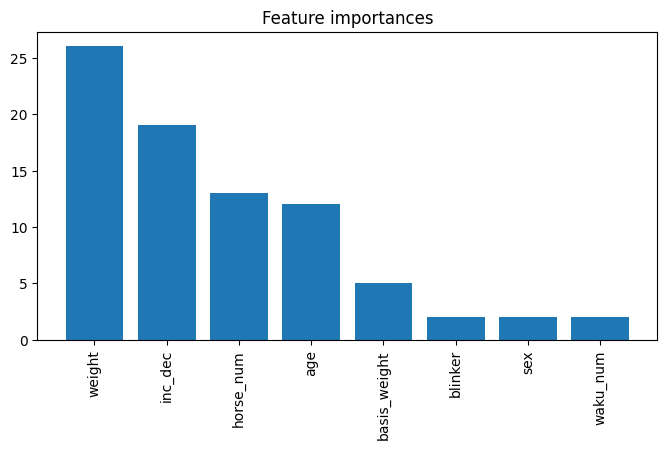

In [12]:
i, model = models[-1]
importances = model.feature_importances_
feature_name = pd.Series(model.feature_name_)

#値が小さい順のインデックスが返されるので、これを[::-1]で反転させている。
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(8,4))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_name[indices], rotation=90)

plt.show()

In [13]:
df2.tail(3)

,year,month,day,times,place,daily,race_num,horse,jockey_id,horse_N,...,pop,prize,error_code,father,mother,id,id_for_fold,race_type,datetime,target
43877,2023,12,28,5,阪神,9,12,クムシラコ,1112,16,...,15.0,0,0,ディスクリートキャット,デイドリーマー,2018103205,2023122809050912,平地芝,2023-12-28 12:03:00,0
43870,2023,12,28,5,阪神,9,12,メイショウドウドウ,1171,16,...,11.0,0,0,ヴィクトワールピサ,ダンシングブルーム,2015103357,2023122809050912,平地芝,2023-12-28 12:03:00,0
43872,2023,12,28,5,阪神,9,12,エグレムニ,1154,16,...,13.0,0,0,キズナ,ビーチアイドル,2017104873,2023122809050912,平地芝,2023-12-28 12:03:00,0
